# process raw bam data

In [1]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})

<Figure size 432x288 with 0 Axes>

In [2]:
import re
import glob
import os
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
import numpy as np
import pandas as pd

In [3]:
import nr_utils

In [4]:
bam_data_dir = "/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData"

In [5]:
reg = re.compile(r'raw|psi4|hFFI')                    # Compile the regex
test = list(filter(lambda x: not reg.search(x), glob.glob(os.path.join(bam_data_dir, "*/**/*.bbh")))) 

In [6]:
test

['/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q10S0/q10_T_80_320r7c5/q10_T_80_320r7c5.bbh',
 '/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q10S0/q10c25e1c_T_80_320/q10c25e1c_T_80_320.bbh',
 '/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q10S0/q10c25e205_T_80_320/q10c25e205_T_80_320.bbh',
 '/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q10S0/q10c25eB_T_80_320/q10c25eB_T_80_320.bbh',
 '/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q10S0/q10c25eC_T_80_420/q10c25eC_T_80_420.bbh',
 '/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q10S0/q10c25e_T_112_448/q10c25e_T_112_448.bbh',
 '/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q10S0/q10c5e_T_80_320/q10c5e_T_80_320.bbh',

In [7]:
bam_data = {}

bam_data['q4a0_T_80_320'] =  {
    'metadata':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q4a0a0/q4a0_T_80_320/q4a0_T_80_320.bbh",
    'psi4':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q4a0a0/q4a0_T_80_320/Psi4ModeDecomp/psi3col.r6.l6.l2.m2.gz",
    'safety_factor':0.2,
}


bam_data['q4a0_T_96_384'] =  {
    'metadata':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q4a0a0/q4a0_T_96_384/q4a0_T_96_384.bbh",
    'psi4':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q4a0a0/q4a0_T_96_384/Psi4ModeDecomp/psi3col.r6.l6.l2.m2.gz",
    'safety_factor':0.2,
}

bam_data['q4a0_T_112_448'] =  {
    'metadata':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q4a0a0/q4a0_T_112_448/q4a0_T_112_448.bbh",
    'psi4':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q4a0a0/q4a0_T_112_448/Psi4ModeDecomp/psi3col.r6.l6.l2.m2.gz",
    'safety_factor':0.2,
}

bam_data['q8a0a0c05_T_80_420'] = {
    'metadata': '/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0c05_T_80_420/q8a0a0c05_T_80_420.bbh',
    'psi4':'/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0c05_T_80_420/Psi4ModeDecomp/psi3col.r6.l6.l2.m2.gz',
    'safety_factor':0.3,
}

bam_data['q8a0a0_T_96_504n512'] = {
    'metadata':'/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0_T_96_504n512/q8a0a0_T_96_504n512.bbh',
    'psi4':'/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0_T_96_504n512/Psi4ModeDecomp/psi3col.r6.l6.l2.m2.gz',
    'safety_factor':0.3,
}

bam_data['q8a0a0_T_112_588n768'] = {
    'metadata':'/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0_T_112_588n768/q8a0a0_T_112_588n768.bbh',
    'psi4':'/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0_T_112_588n768/Psi4ModeDecomp/psi3col.r6.l6.l2.m2.gz',
    'safety_factor':0.3,
}

bam_data['q10c25e_T_112_448'] =  {
    'metadata':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q10S0/q10c25e_T_112_448/q10c25e_T_112_448.bbh",
    'psi4':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q10S0/q10c25e_T_112_448/Psi4BAMModes/psi3col_bam_r7.l4.l2.m2.gz",
    'safety_factor':0.3,
}


bam_data['q18a0a0c025_120'] =  {
    'metadata':'/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0a0c025_120/q18a0a0c025_120/q18a0a0c025_120.bbh',
    'psi4':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0a0c025_120/q18a0a0c025_120/Psi4ModeDecomp/psi3col.r9.l4.l2.m2.gz",
    'safety_factor':0.3,
}


bam_data['q18a0a0c025_144'] =  {
    'metadata':'/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0a0c025_144/q18a0a0c025_144/q18a0a0c025_144.bbh',
    'psi4':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0a0c025_144/q18a0a0c025_144/Psi4ModeDecomp/psi3col.r9.l4.l2.m2.gz",
    'safety_factor':0.3,
}


bam_data['q18a0a0c025_96_fine'] =  {
    'metadata':'/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0a0c025_96_fine/q18a0a0c025_96_fine/q18a0a0c025_96_fine.bbh',
    'psi4':"/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0a0c025_96_fine/q18a0a0c025_96_fine/Psi4ModeDecomp/psi3col.r9.l5.l2.m2.gz",
    'safety_factor':0.3,
}



In [8]:
nrls = {}

for k in bam_data.keys():
    print(k)
    nrls[k] = nr_utils.NRLoader(handler='bam', psi4_filename=bam_data[k]['psi4'], metadata_filename=bam_data[k]['metadata'], dt=0.1, safety_factor=bam_data[k]['safety_factor'])

q4a0_T_80_320
q4a0_T_96_384
q4a0_T_112_448


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


q8a0a0c05_T_80_420
q8a0a0_T_96_504n512
q8a0a0_T_112_588n768
q10c25e_T_112_448
q18a0a0c025_120
q18a0a0c025_144
q18a0a0c025_96_fine


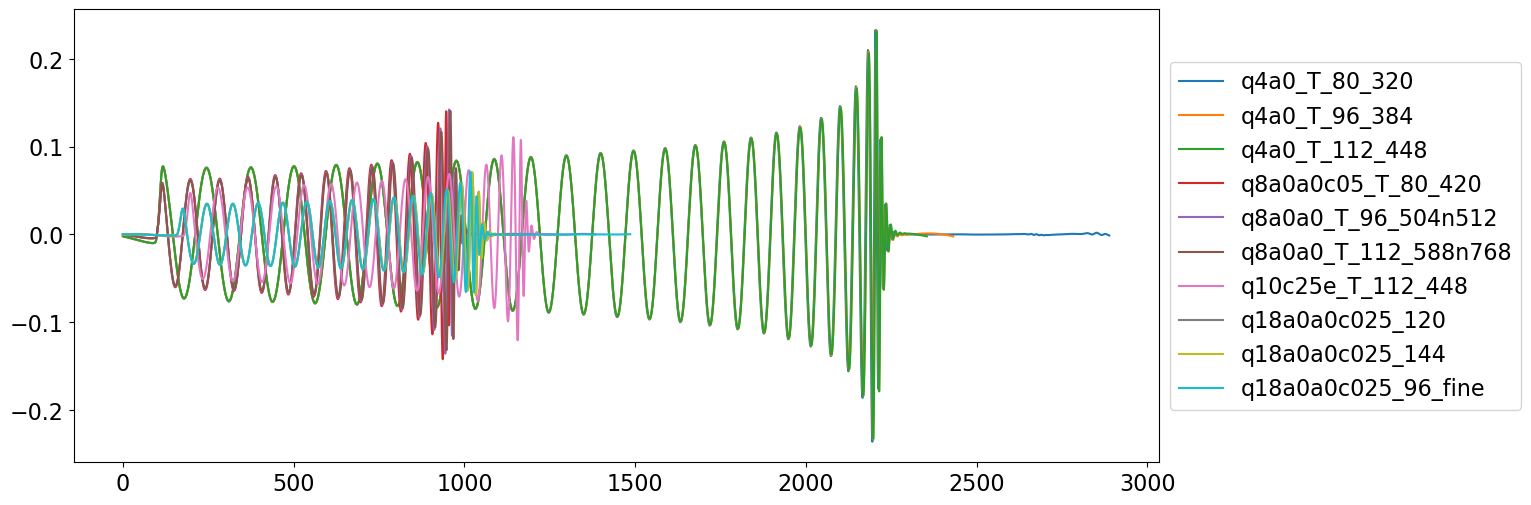

In [9]:
plt.figure(figsize=(14, 6), dpi=100)
for k in nrls.keys():
    t = nrls[k].times
    s = nrls[k].strain
    peak_idx = np.argmax(np.abs(s))
    t_max = t[peak_idx]

    # plt.plot(t-t_max, s.real, label=k)
    # plt.plot(t-t_max, np.abs(s)/nrls[k].eta, label=k)
    # plt.plot(t-t_max, np.abs(s), label=k)
    plt.plot(t, np.real(s), label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-100, 10)
# plt.ylim(0.9, 1.6)

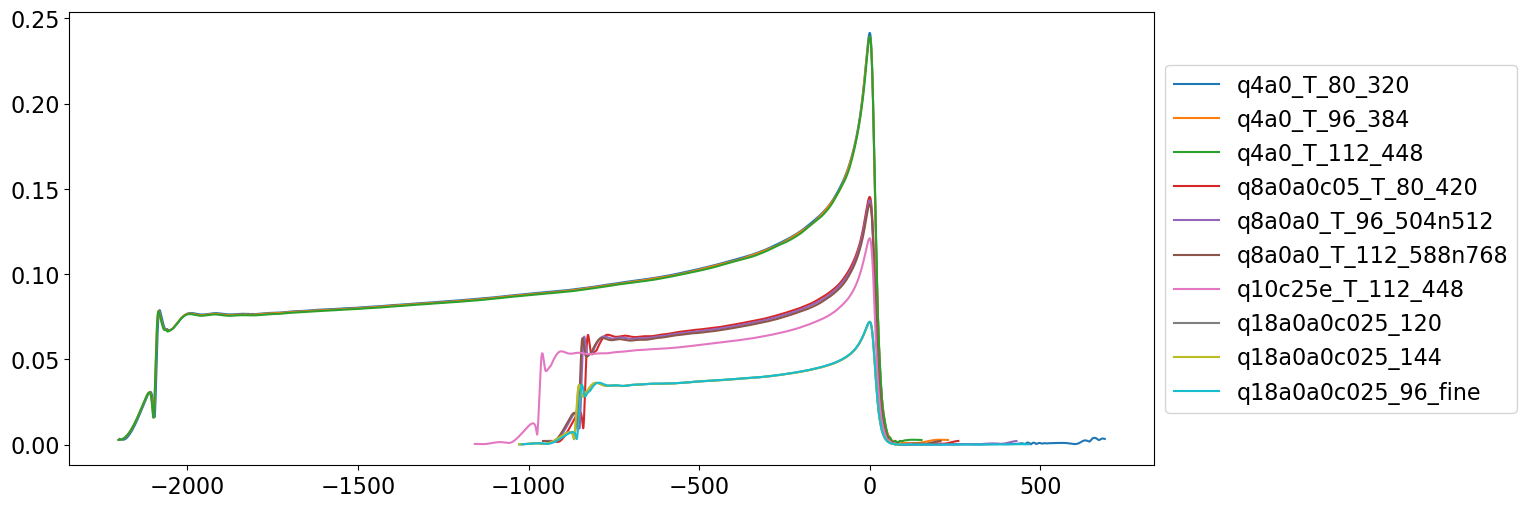

In [10]:
plt.figure(figsize=(14, 6), dpi=100)
for k in nrls.keys():
    t = nrls[k].times
    s = nrls[k].strain
    peak_idx = np.argmax(np.abs(s))
    t_max = t[peak_idx]

    # plt.plot(t-t_max, s.real, label=k)
    # plt.plot(t-t_max, np.abs(s)/nrls[k].eta, label=k)
    plt.plot(t-t_max, np.abs(s), label=k)
    # plt.plot(t, np.abs(s), label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-100, 10)
# plt.ylim(0.9, 1.6)

(-100.0, 100.0)

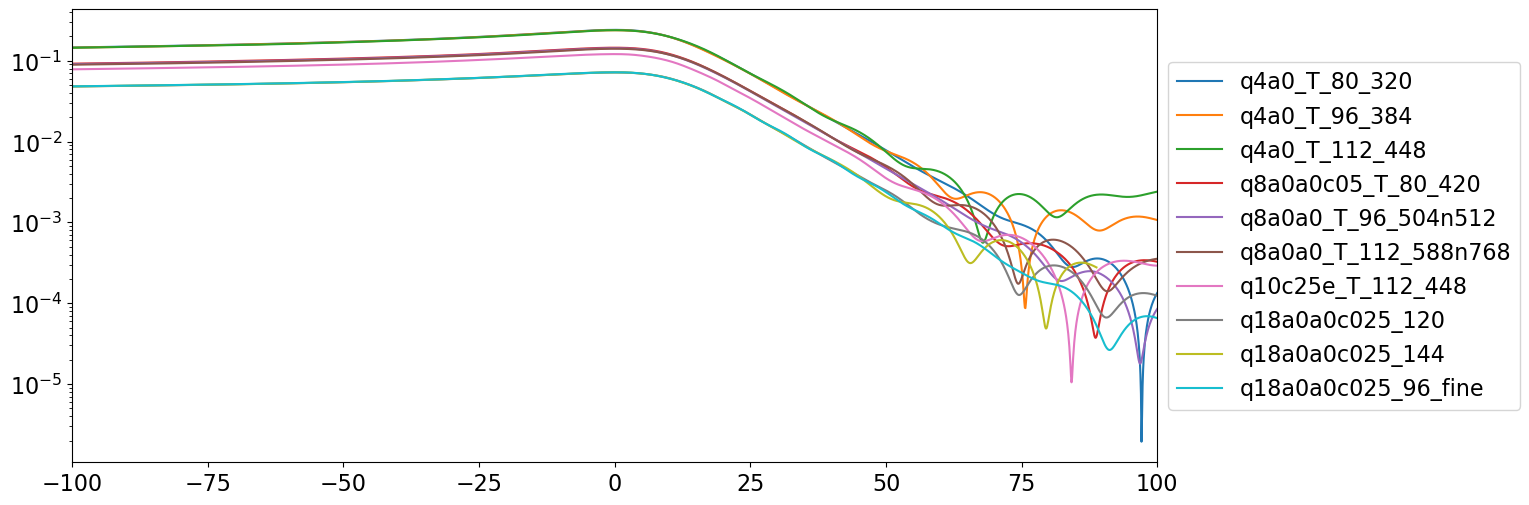

In [11]:
plt.figure(figsize=(14, 6), dpi=100)
for k in nrls.keys():
    t = nrls[k].times
    s = nrls[k].strain
    peak_idx = np.argmax(np.abs(s))
    t_max = t[peak_idx]

    # plt.plot(t-t_max, s.real, label=k)
    plt.plot(t-t_max, np.abs(s), label=k)
    # plt.plot(t, np.abs(s), label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xlim(-100, 100)

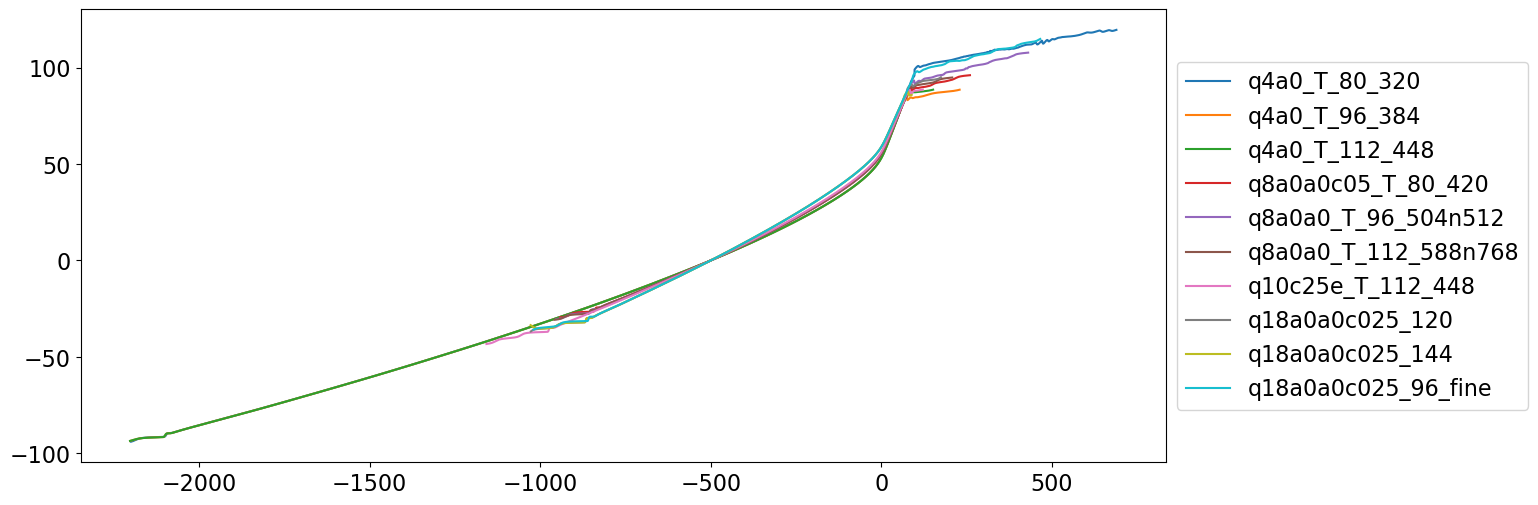

In [12]:
plt.figure(figsize=(14, 6), dpi=100)
for k in nrls.keys():
    t = nrls[k].times
    s = nrls[k].strain
    peak_idx = np.argmax(np.abs(s))
    t_max = t[peak_idx]

    amp = np.abs(s)
    phi = np.unwrap(np.angle(s))

    phi0 = IUS(t-t_max, phi)(-500)

    plt.plot(t-t_max, phi-phi0, label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-100, 250)
# plt.ylim(30, 90)

(0.01, 0.6)

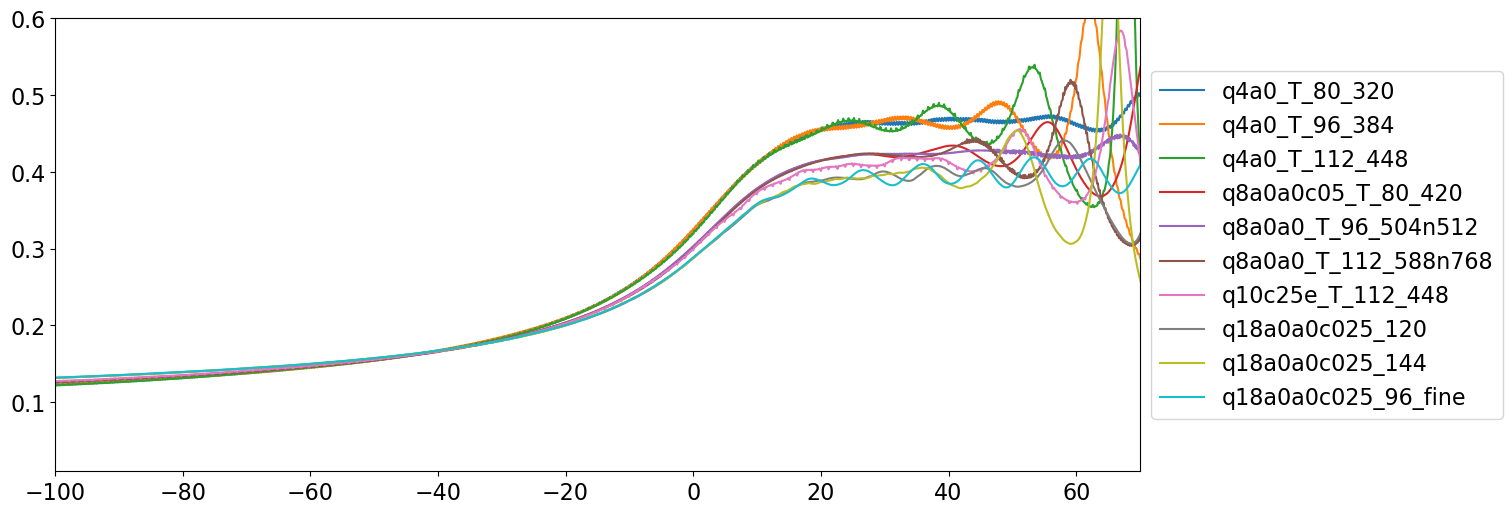

In [13]:
plt.figure(figsize=(14, 6), dpi=100)
for k in nrls.keys():
    t = nrls[k].times
    s = nrls[k].strain
    peak_idx = np.argmax(np.abs(s))
    t_max = t[peak_idx]

    amp = np.abs(s)
    phi = np.unwrap(np.angle(s))

    freq = IUS(t, phi).derivative()(t)

    plt.plot(t-t_max, freq, label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-100, 70)
plt.ylim(1e-2, 0.6)
# plt.yscale('log')

In [14]:
for k in nrls.keys():
    print(k, nrls[k].q, nrls[k].Mtotal)

q4a0_T_80_320 3.9999250011249834 1.0
q4a0_T_96_384 3.9999250011249834 1.0
q4a0_T_112_448 3.9999250011249834 1.0
q8a0a0c05_T_80_420 8.000009000009 1.0
q8a0a0_T_96_504n512 8.000009000009 1.0
q8a0a0_T_112_588n768 8.000009000009 1.0
q10c25e_T_112_448 9.996319345018684 1.0038331
q18a0a0c025_120 17.998126782264087 0.9999987
q18a0a0c025_144 17.998126782264087 0.9999987
q18a0a0c025_96_fine 17.998126782264087 0.9999987


# prepare to save data

In [17]:
nrls['q4a0_T_80_320'].q

3.9999250011249834

In [18]:
nrls['q4a0_T_80_320'].times

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 2.8884e+03, 2.8885e+03,
       2.8886e+03])

In [19]:
nrls['q4a0_T_80_320'].dt

0.1

In [20]:
nrls['q4a0_T_80_320'].strain

array([-0.00123799+0.00313124j, -0.00124982+0.0031183j ,
       -0.00126167+0.0031053j , ..., -0.00120116+0.00317004j,
       -0.00121351+0.0031574j , -0.00122558+0.00314468j])

In [21]:
nrls.keys()

dict_keys(['q4a0_T_80_320', 'q4a0_T_96_384', 'q4a0_T_112_448', 'q8a0a0c05_T_80_420', 'q8a0a0_T_96_504n512', 'q8a0a0_T_112_588n768', 'q10c25e_T_112_448', 'q18a0a0c025_120', 'q18a0a0c025_144', 'q18a0a0c025_96_fine'])

In [27]:
meta_data_output = [[k, np.around(nrls[k].q, 2)] for k in nrls.keys()]

In [37]:
df = pd.DataFrame(meta_data_output, columns=['name', 'q'])

In [47]:
data_dir = "/Users/sebastian.khan/personal/data/bam_dec_2022"

In [48]:
# meta_data_filename = os.path.join(data_dir, "metadata.csv")
# df.to_csv(meta_data_filename, index=False)

In [63]:
# for k in nrls.keys():
#     t = nrls[k].times
#     s = nrls[k].strain
#     s_re = s.real
#     s_im = s.imag
#     out_arr = np.column_stack((t, s_re, s_im))
#     output_filename = os.path.join(data_dir, f"{k}")
#     np.save(output_filename, out_arr)